In [8]:
n = 6
m = 10
k = 3 # 3-SAT


In [9]:
from benchmark.weighted_problem import WeightedProblem
problem = WeightedProblem(n, m, k)

In [10]:
for (c, w) in problem.formula.weighted_clauses:
    print(f'Clause: {c}, weight: {w}')

Clause: (¬x5 ∨ x0 ∨ x3), weight: 8.898918299197032
Clause: (x2 ∨ x1 ∨ ¬x0), weight: 2.691819997794538
Clause: (¬x4 ∨ ¬x2 ∨ ¬x1), weight: 6.8404499938024275
Clause: (x4 ∨ x5 ∨ ¬x3), weight: 2.280724746943764
Clause: (¬x0 ∨ x5 ∨ x4), weight: 4.549431109922791
Clause: (¬x4 ∨ ¬x0 ∨ ¬x2), weight: 3.8769446105500394
Clause: (x1 ∨ x5 ∨ ¬x4), weight: 0.415301838611456
Clause: (x4 ∨ x1 ∨ ¬x4), weight: 2.07760314035201
Clause: (x4 ∨ x3 ∨ x1), weight: 3.7536639267481497
Clause: (¬x0 ∨ ¬x5 ∨ ¬x1), weight: 1.5077846234313608


In [11]:
from max_3_sat.quantum_solver import QuantumSolver

quantum_solver = QuantumSolver()
qmax_sats = quantum_solver.max_sat(problem.formula, ret_num=2)


In [12]:
for ass in qmax_sats:
    print(ass)
    print(f'Assignment: {ass}, weight: {problem.formula.assignment_weight(ass)}')

010111
Assignment: 010111, weight: 36.89264228735357
000110
Assignment: 000110, weight: 36.47734044874211


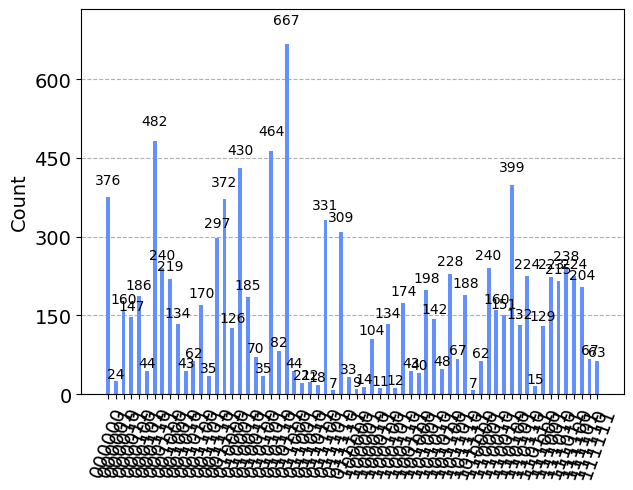

In [13]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

plot_histogram(quantum_solver.result)

In [14]:
from pysat.examples.rc2 import RC2

rc2 = RC2(problem.formula.to_pysat())

for i in range(4):
    model = rc2.compute()
    ass = ''.join(['1' if x > 0 else '0' for x in model])
    print(f'Assigment: {ass}, weight: {problem.formula.assignment_weight(ass)}')
    rc2.add_clause([-l for l in model])

Assigment: 010000, weight: 36.89264228735357
Assigment: 010010, weight: 36.89264228735357
Assigment: 011000, weight: 36.89264228735357
Assigment: 011101, weight: 36.89264228735357
